In [1]:
import sys
import pandas
import numpy
import sklearn
import matplotlib

print ('Python : {}'.format(sys.version))
print ('Numpy : {}'.format(numpy.__version__))
print ('pandas : {}'.format(pandas.__version__))
print ('matplotlib : {}'.format(matplotlib.__version__))
print ('sklearn : {}'.format(sklearn.__version__))

Python : 2.7.16 |Anaconda, Inc.| (default, Sep 24 2019, 16:55:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy : 1.16.5
pandas : 0.24.2
matplotlib : 2.2.3
sklearn : 0.20.3


In [17]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [7]:
#importing data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size'
      ,'bare_nuclei','bland_chromatin','normal_neucloli','mitosis','class']
df=pd.read_csv(url,names=names)


In [10]:
#Pre processing 
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)
#print shape of dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index([u'id', u'clump_thickness', u'uniform_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'single_epithelial_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_neucloli', u'mitosis', u'class'],
      dtype='object')]
(699, 10)


In [19]:
#data visualization
print(df.loc[555])
print (df.describe())

clump_thickness           4
uniform_cell_size         3
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           4
normal_neucloli           8
mitosis                   1
class                     2
Name: 555, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              69

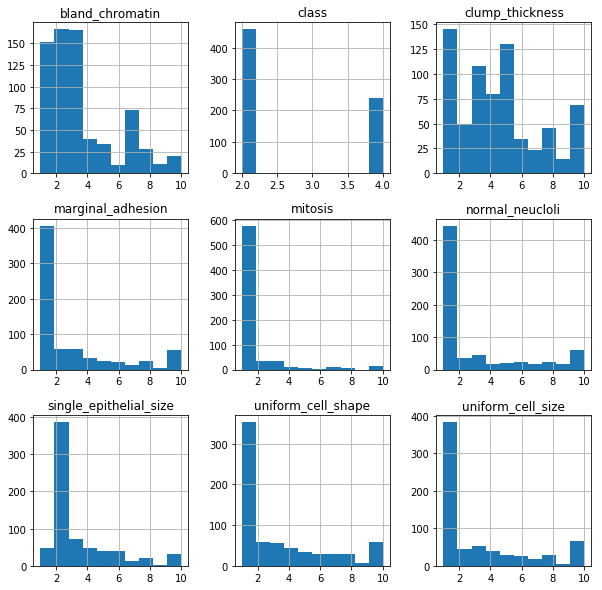

In [18]:
#Plot graphs
df.hist(figsize=(10,10))
plt.show()